In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
import seaborn as sns

In [3]:

cm_path = 'child_mortality_0_5_year_olds_dying_per_1000_born.csv'
fe_path = 'children_per_woman_total_fertility.csv'
cm = pd.read_csv(cm_path).set_index('country')['2017'].to_frame()/10
fe = pd.read_csv(fe_path).set_index('country')['2017'].to_frame()
child_data = cm.merge(fe, left_index=True, right_index=True).dropna()
child_data.columns = ['mortality', 'fertility']
child_data.head()

,mortality,fertility
country,,
Afghanistan,6.470,4.48
Angola,8.040,5.62
Albania,0.902,1.71
United Arab Emirates,0.768,1.73
Argentina,1.040,2.28


In [4]:
cntr_child = child_data - child_data.mean(axis=0)
cntr_child

,mortality,fertility
country,,
Afghanistan,3.535167,1.726828
Angola,5.105167,2.866828
Albania,-2.032833,-1.043172
United Arab Emirates,-2.166833,-1.023172
Argentina,-1.894833,-0.473172
...,...,...
Samoa,-1.304833,1.176828
Yemen,2.565167,1.136828
South Africa,0.595167,-0.323172


In [5]:
svd = np.linalg.svd

In [6]:
U, S, Vt = svd(cntr_child, full_matrices=False)
Vt

array([[-0.92818863, -0.37211002],
       [ 0.37211002, -0.92818863]])

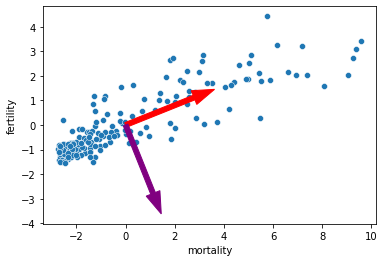

In [7]:
sns.scatterplot(data=cntr_child, x='mortality', y='fertility')
plt.arrow(0, 0, -3 * Vt[0, 0], -3 * Vt[0, 1], width=0.2, color='red')
plt.arrow(0, 0, 3 * Vt[1, 0], 3 * Vt[1, 1], width=0.2, color='purple')
plt.gca().set_aspect(1)

In [35]:
def compute_rank_k_approximation(data, k):
    centered = data - data.mean(axis=0)
    U, S, Vt = np.linalg.svd(centered, full_matrices = False)
    approx = (U @ np.diag(S))[:, :k] @ Vt[:k]
    return pd.DataFrame(approx, columns = data.columns)

In [36]:
rank_1 = compute_rank_k_approximation(child_data, 1)
rank_1

,mortality,fertility
0,3.642093,1.460112
1,5.388444,2.160223
2,-2.111655,-0.846561
3,-2.220193,-0.890073
4,-1.795892,-0.719971
...,...,...
181,-0.717696,-0.287724
182,2.602626,1.043390
183,0.401137,0.160815
184,3.340905,1.339366


In [39]:
rank_1 = rank_1 - np.mean(rank_1, axis=0)
U, S, Vt = svd(rank_1, full_matrices=False)
Vt

array([[-0.92818863, -0.37211002],
       [ 0.37211002, -0.92818863]])

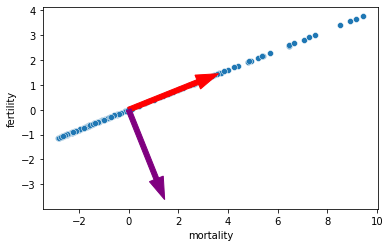

In [40]:
sns.scatterplot(data=rank_1, x='mortality', y='fertility')
plt.arrow(0, 0, -3 * Vt[0, 0], -3 * Vt[0, 1], width=0.2, color='red')
plt.arrow(0, 0, 3 * Vt[1, 0], 3 * Vt[1, 1], width=0.2, color='purple')
plt.gca().set_aspect(1)